In [1]:
from src.latent_vector_approximator import LatentVectorApproximator
from src.utils.utils import get_training_and_validation_sets

c:\Users\giuli\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
X_train, Y_train, cX_train, X_val, Y_val, cX_val = get_training_and_validation_sets()

In [3]:
import numpy as np
import cv2

def rgb2gray(rgb):
    # rgb: (3, 64, 64)
    # return: (1, 64, 64)
    return np.dot(rgb[...,:], [0.2989, 0.5870, 0.1140]).reshape(1, 64, 64)

def dataset_to_greyscale(dataset):
    return np.array([rgb2gray(img.T) for img in dataset])

In [4]:
X_train_bw = dataset_to_greyscale(X_train)
X_val_bw = dataset_to_greyscale(X_val)

In [5]:
X_train.shape, X_val.shape, X_train_bw.shape, X_val_bw.shape

((4344, 3, 64, 64), (1087, 3, 64, 64), (4344, 1, 64, 64), (1087, 1, 64, 64))

### Train Model with Gray Scale Images

In [6]:
input_dim = X_train_bw[0].shape
latent_dim = 1280 #128
conditions_dim = cX_train[0].shape[0]

model = LatentVectorApproximator(input_dim=input_dim, latent_dim=latent_dim, conditions_dim=conditions_dim, 
    patience=10, loss_function='binary_crossentropy')

LatentVectorApproxiator initialized


In [7]:
model.train(X_train_bw[:100], cX_train[:100], X_val_bw[:20], cX_val[:20], pre_train_epochs=5, epochs=20, batch_size=50)

Training VAE
Epoch 1/5
2/2 [==============================] - 3s 1s/step - loss: 0.6931 - accuracy: 0.1828 - mae: 0.3409 - val_loss: 0.6928 - val_accuracy: 0.0000e+00 - val_mae: 0.3409
Epoch 2/5
2/2 [==============================] - 1s 767ms/step - loss: 0.6927 - accuracy: 0.0000e+00 - mae: 0.3406 - val_loss: 0.6925 - val_accuracy: 0.0000e+00 - val_mae: 0.3405
Epoch 3/5
2/2 [==============================] - 1s 818ms/step - loss: 0.6924 - accuracy: 0.0000e+00 - mae: 0.3402 - val_loss: 0.6920 - val_accuracy: 0.9328 - val_mae: 0.3401
Epoch 4/5
2/2 [==============================] - 1s 844ms/step - loss: 0.6919 - accuracy: 0.9127 - mae: 0.3398 - val_loss: 0.6916 - val_accuracy: 0.9328 - val_mae: 0.3396
Epoch 5/5
1/1 [==============================] - 0s 56ms/step
Training first Generator
Epoch 1/5
2/2 [==============================] - 3s 637ms/step - loss: 0.6931 - accuracy: 0.9283 - mae: 0.3409 - val_loss: 0.6929 - val_accuracy: 0.9484 - val_mae: 0.3409
Epoch 2/5
2/2 [=================

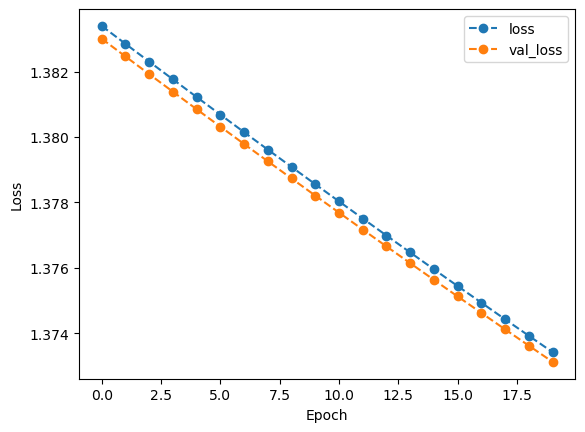

In [8]:
model.visualize_loss()

In [9]:
z1, z = model.recostruct(X_val_bw[0], cX_val[0])
z1.shape, z.shape

1/1 [==============================] - 1s 1s/step


((1, 1, 64, 64), (1, 1, 64, 64))

1/1 [==============================] - 0s 46ms/step


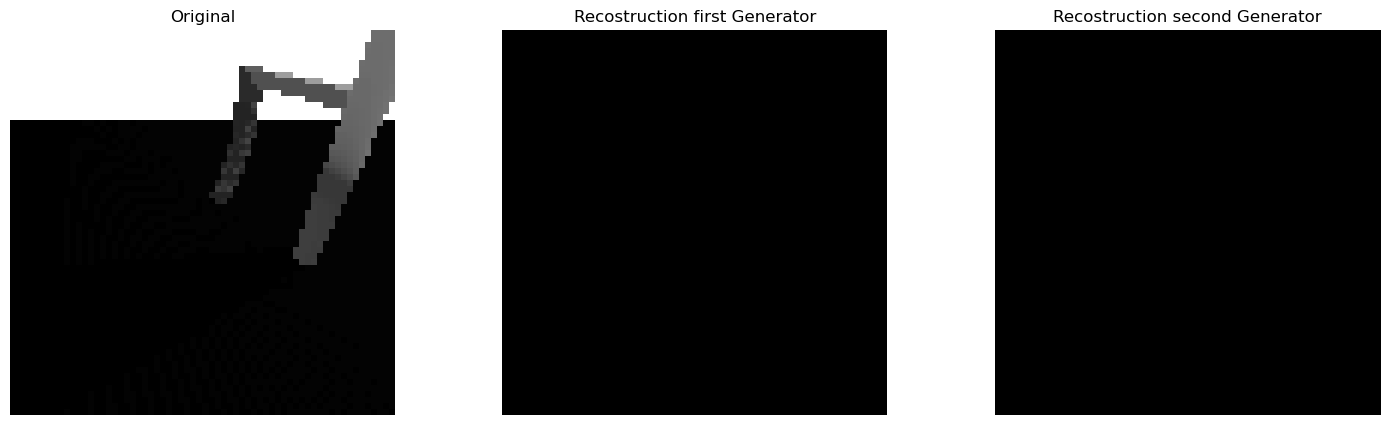

In [12]:
model.visualize_recostruction(X_val_bw[0], cX_val[0])